<a href="https://colab.research.google.com/github/Virzlauvinen/Procesamiento-de-Imagenes/blob/Vir/P_de_Imagenes_Proyecto_Final_RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Vincula Colab con Drive (monta el Drive en la máquina virtual que nos provee Google, asi puedo guardar todos los cambios que haga mi notebook en archivos, imagenes etc en el drive)
from google.colab import drive
drive.mount('/content/DRIVE')

Mounted at /content/DRIVE


# P. IMAGENES  - PROYECTO FINAL

# LIBRERIAS

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

# A - MODELO CNN

In [ ]:
#Cargamos el dataset cifar10
#This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.
mnist = keras.datasets.cifar10
(train_inputs, train_labels),(test_inputs, test_labels) = mnist.load_data()
print("Train inputs: " + str(train_inputs.shape))
print("Train labels: " + str(train_labels.shape))
print("Test inputs: " + str(test_inputs.shape))
print("Test labels: " + str(test_labels.shape))

170498071/170498071 [==============================] - 2s 0us/step
Train inputs: (50000, 32, 32, 3)
Train labels: (50000, 1)
Test inputs: (10000, 32, 32, 3)
Test labels: (10000, 1)


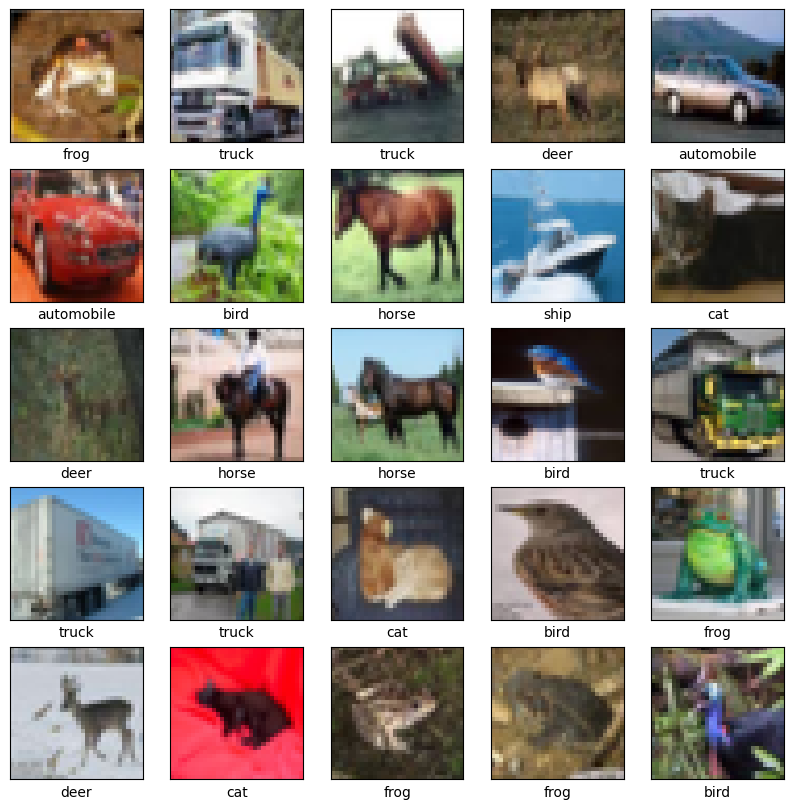

In [ ]:
# Añadimos la lista de nombres de cada clase.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Imprimimos unos cuantos elementos del dataset para poder verlos.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_inputs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

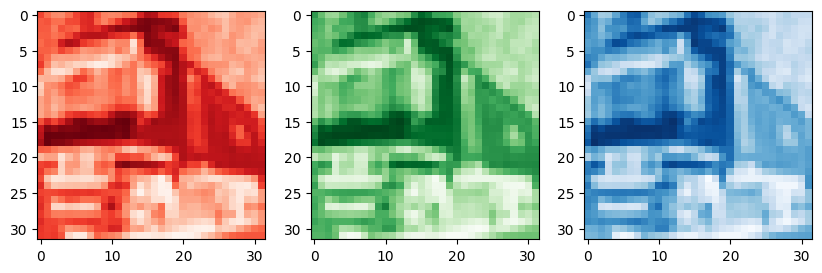

In [ ]:
# Vemos los 3 canales (RGB) de una imagen.

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].imshow(train_inputs[1][:,:,0], cmap="Reds")
axs[1].imshow(train_inputs[1][:,:,1], cmap="Greens")
axs[2].imshow(train_inputs[1][:,:,2], cmap="Blues")

plt.show()

In [ ]:
# Normalizamos las entradas --> FILTRO de Normalizacion
train_inputs = train_inputs / 255.0 #para que los valores estén en el rango de [0, 1]
test_inputs = test_inputs / 255.0 #para que los valores estén en el rango de [0, 1]
# Esto ayuda a estandarizar las entradas, acelerar la convergencia durante el entrenamiento y mejorar la estabilidad del modelo durante el entrenamiento.

In [ ]:
#Empezamos a armar la arquitectura
model = keras.Sequential()
model.add(layers.Input(shape=(32,32,3)))# ---> vector  L (Entrada para calcular la diferencia y a la q le voy a aplicarr la funcion de energia o loss)

In [ ]:
model.add(layers.Conv2D(6, (5,5), activation='relu')) ## 6 filtros de 5*5

# Output shape // Tamaño de salida de la imagen ---> No hay padding por lo que la imagen se reduce
# (ximg - xfilt + 1) * (yimg - yfilt +1)
# (32 - 5 + 1) (32 - 5 +1) = (28)(28)

#Si tuviese padding hubiese tenido que ser de 2 ---> p= ((tamaño filtro-1)/2)
# (ximg - xfilt + 1 + 2 padding) * (yimg - yfilt + 1 + 2 padding)
# (32 - 5 + 1 + 2*2) (32 - 5 + 1 + 2*2) = (32)(32)


# Cantidad de parametros
# ((xfil * yfilt * channels) + bias) * cantfiltros
# ((5 * 5 * 3)+1) * 6 = 456

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Disminucion del tamaño. ---> A la mitad xq el maxpool es de 2*2
model.add(layers.MaxPool2D((2,2), strides=2)) #¿El strides tiene que ser siempre del mismo tamaño que el pool?
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(16, (5,5), strides = (1,1), padding='valid', activation='relu'))
model.summary()

# Output shape
# (ximg - xfilt + 1) * (yimg - yfilt +1)
# (14 - 5 + 1) (14 - 5 +1) = (10)(10)

# Cantidad de parametros
# ((xfil * yfilt * channels) + bias) * cantfiltros
# ((5 * 5 * 6)+1) * 16 = 2416

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Disminuimos nuevamente el tamaño.
model.add(layers.MaxPool2D((2,2), strides=2))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-trainabl

In [ ]:
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))#---> Vector psi (salida)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
# Compilamos el modelo seleccionando algunos hiperparametros.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS el modelo con los datos de input, y verificamos las metricas seleccionadas para cada epoca con el set de test.
history=model.fit(train_inputs, train_labels,
                  epochs=8,
                  batch_size=100,
                  shuffle=True,
                  validation_data=(test_inputs, test_labels))

Epoch 1/8
500/500 [==============================] - 33s 63ms/step - loss: 1.7380 - accuracy: 0.3720 - val_loss: 1.4744 - val_accuracy: 0.4645
Epoch 2/8
500/500 [==============================] - 28s 56ms/step - loss: 1.4348 - accuracy: 0.4843 - val_loss: 1.3725 - val_accuracy: 0.5028
Epoch 3/8
500/500 [==============================] - 28s 57ms/step - loss: 1.3286 - accuracy: 0.5271 - val_loss: 1.2889 - val_accuracy: 0.5391
Epoch 4/8
500/500 [==============================] - 28s 56ms/step - loss: 1.2526 - accuracy: 0.5541 - val_loss: 1.3193 - val_accuracy: 0.5271
Epoch 5/8
500/500 [==============================] - 27s 54ms/step - loss: 1.1924 - accuracy: 0.5786 - val_loss: 1.2112 - val_accuracy: 0.5742
Epoch 6/8
500/500 [==============================] - 28s 56ms/step - loss: 1.1443 - accuracy: 0.5946 - val_loss: 1.2059 - val_accuracy: 0.5779
Epoch 7/8
500/500 [==============================] - 28s 56ms/step - loss: 1.1013 - accuracy: 0.6104 - val_loss: 1.1452 - val_accuracy: 0.5985

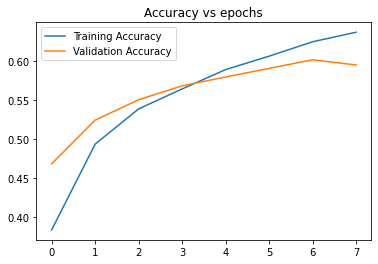

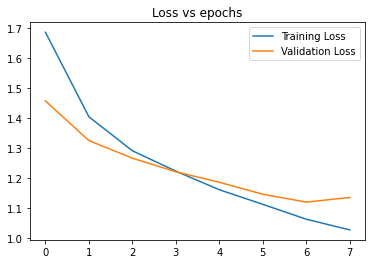

In [ ]:
# Generamos un grafico donde se puede ver el aumento de accuracy y disminucion de loss a travez de las epocas del entrenamiento.
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['accuracy'] )
plt.plot( history.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss']);

In [ ]:
#Guardo modelo entrenado
model.save('modelo_entrenado.h5')

In [ ]:
# Obtenemos las predicciones de los datos de test.
predictions = model.predict(test_inputs)

313/313 [==============================] - 3s 9ms/step


In [ ]:
# Obtenemos valores comparables con los valores de test_labels.
np.argmax(predictions,axis=1)

array([3, 1, 1, ..., 5, 4, 7])

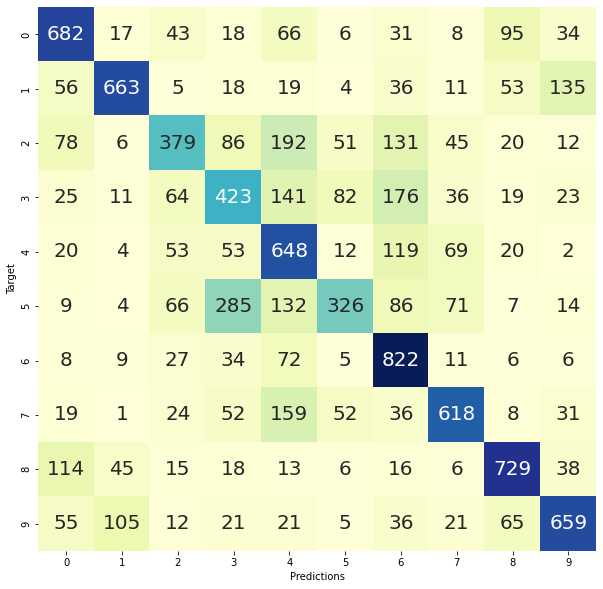

In [ ]:
# Imprimimos la matriz de confusion.
cm=confusion_matrix(test_labels, np.argmax(predictions,axis=1))
cm_df=pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');

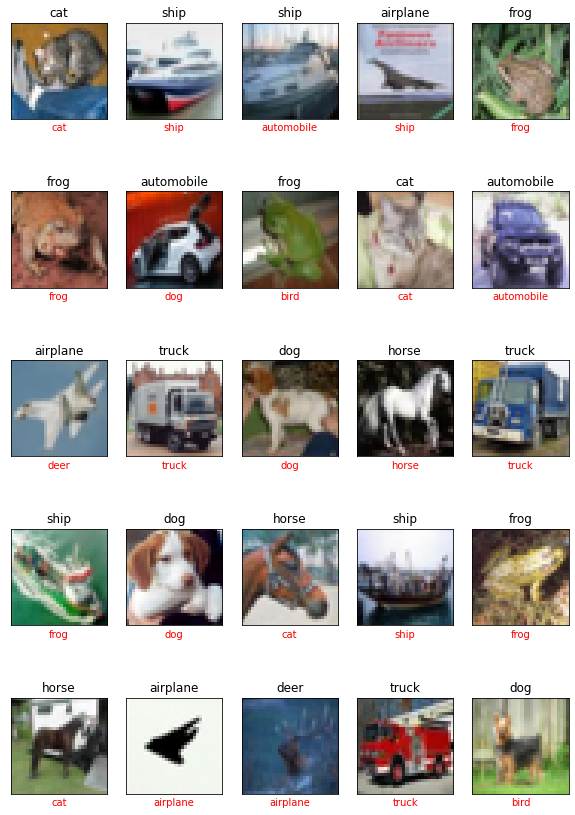

In [ ]:
# Imprimimos elementos con sus prediciones.
plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_inputs[i], cmap=plt.cm.binary)
    plt.title(class_names[test_labels[i][0]])
    plt.xlabel(class_names[pred[i]], color = 'r')
plt.show()

In [ ]:
# Visualización de los kernel

# recupero los pesos de la primera capa oculta
filters, bias = model.layers[0].get_weights()

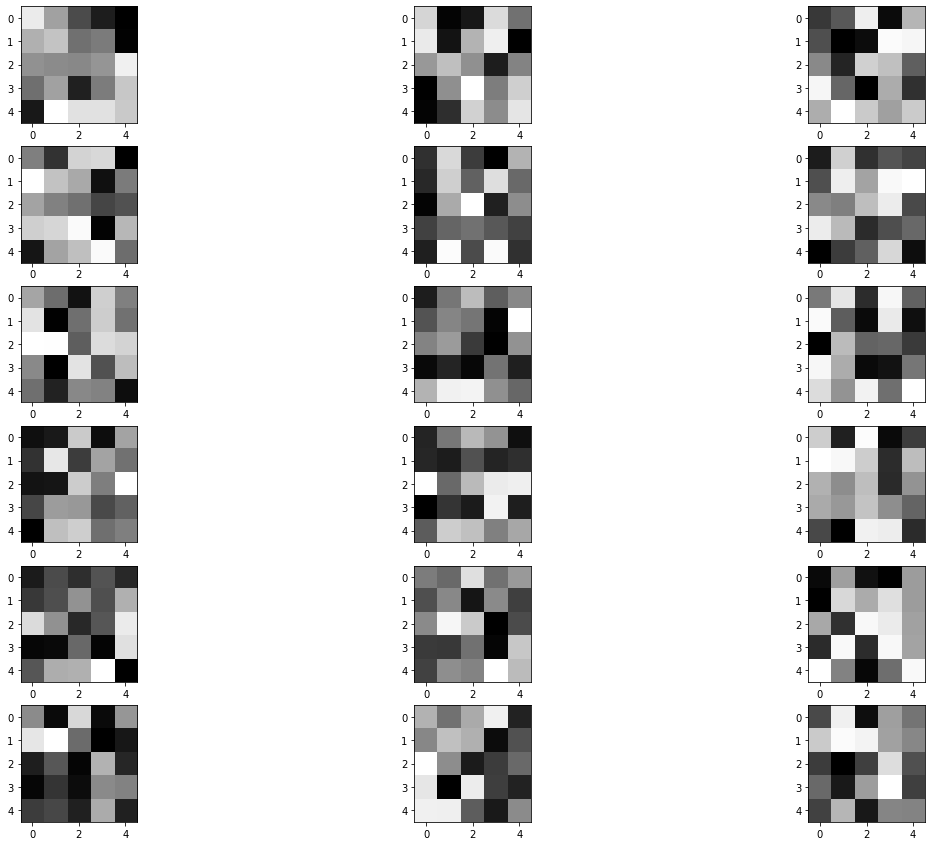

In [ ]:
n_filters =6
ix=1
fig = plt.figure(figsize=(20,15))
for i in range(n_filters):
    # obtener los filtros
    f = filters[:,:,:,i]
    for j in range(3):
        # subplot para 6 filtros y 3 canales
        plt.subplot(n_filters,3,ix,grid=False)
        plt.imshow(f[:,:,j] ,cmap='gray')
        ix+=1
#plot los filtros
plt.show()

image shape:  (1, 32, 32, 3)
1/1 [==============================] - 0s 102ms/step
feature shape:  (1, 28, 28, 6)


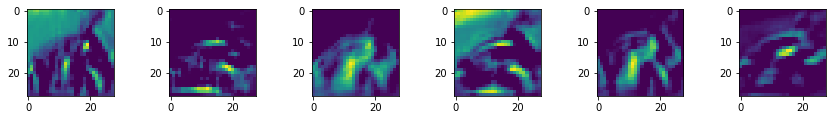

In [ ]:
# Visualizaciòn Feature Maps
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

image = test_inputs[6]
image = np.expand_dims(image, axis=0)


print("image shape: ",image.shape)

features = model.predict(image)
print("feature shape: ",features.shape)
fig = plt.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    plt.subplot(8,8,i)
    plt.imshow(features[0,:,:,i-1])

plt.show()

In [ ]:
print(classification_report(test_labels, np.argmax(predictions,axis=1), target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.64      0.68      0.66      1000
  automobile       0.77      0.66      0.71      1000
        bird       0.55      0.38      0.45      1000
         cat       0.42      0.42      0.42      1000
        deer       0.44      0.65      0.53      1000
         dog       0.59      0.33      0.42      1000
        frog       0.55      0.82      0.66      1000
       horse       0.69      0.62      0.65      1000
        ship       0.71      0.73      0.72      1000
       truck       0.69      0.66      0.67      1000

    accuracy                           0.59     10000
   macro avg       0.61      0.59      0.59     10000
weighted avg       0.61      0.59      0.59     10000



### Evaluacion

Teniendo en cuenta la calidad de las imagenes, y tambien el hecho de que en algunas de ellas intervienen algunos objetos ajenos al tag, concluimos que un accuracy general del 61% es bueno.

Probamos en diferentes ejecuciones a variar el numero de epocas de entrenamiento, pero en general, a partir de la 5º epoca, la ganancia de precision decae.

# B - **¿PODERMOS MEJORAR EL MODELO?**
PROBAMOS MEJORAR EL RENDIMIENTO DEL MODELO A TRAVES DE TECNICAS DE PROCESAMIENTO DE IMAGENES:


#1 - REENTRENO CON IMAGENES REALZADAS

In [ ]:
import numpy as np
import cv2
from tensorflow import keras

# Cargamos el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Crea el kernel de realce
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])

# Aplica el filtro de realce a las imágenes de entrenamiento
x_train_realzadas = np.zeros_like(x_train)
for i in range(len(x_train)):
    img = x_train[i]
    img_realzada = cv2.filter2D(img, -1, kernel)
    x_train_realzadas[i] = img_realzada

# Aplica el filtro de realce a las imágenes de prueba
x_test_realzadas = np.zeros_like(x_test)
for i in range(len(x_test)):
    img = x_test[i]
    img_realzada = cv2.filter2D(img, -1, kernel)
    x_test_realzadas[i] = img_realzada

# Normaliza los valores de píxel de las imágenes
x_train_realzadas = x_train_realzadas.astype('float32') / 255.0
x_test_realzadas = x_test_realzadas.astype('float32') / 255.0


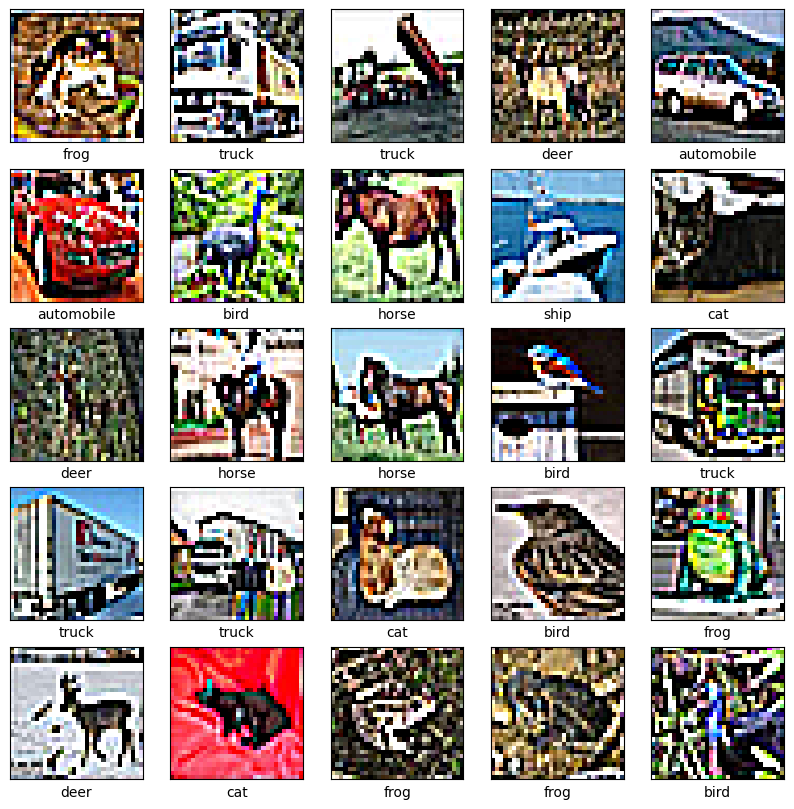

In [ ]:
# Añadimos la lista de nombres de cada clase.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Imprimimos unos cuantos elementos del dataset para poder verlos.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_realzadas [i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
#Empezamos a armar la arquitectura
model_realzado = keras.Sequential()
model_realzado.add(layers.Input(shape=(32,32,3)))# ---> vector  L (Entrada para calcular la diferencia y a la q le voy a aplicarr la funcion de energia o loss)

In [ ]:
model_realzado.add(layers.Conv2D(6, (5,5), activation='relu')) ## 6 filtros de 5*5

# Output shape // Tamaño de salida de la imagen ---> No hay padding por lo que la imagen se reduce
# (ximg - xfilt + 1) * (yimg - yfilt +1)
# (32 - 5 + 1) (32 - 5 +1) = (28)(28)

#Si tuviese padding hubiese tenido que ser de 2 ---> p= ((tamaño filtro-1)/2)
# (ximg - xfilt + 1 + 2 padding) * (yimg - yfilt + 1 + 2 padding)
# (32 - 5 + 1 + 2*2) (32 - 5 + 1 + 2*2) = (32)(32)


# Cantidad de parametros
# ((xfil * yfilt * channels) + bias) * cantfiltros
# ((5 * 5 * 3)+1) * 6 = 456

model_realzado.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Disminucion del tamaño. ---> A la mitad xq el maxpool es de 2*2
model_realzado.add(layers.MaxPool2D((2,2), strides=2)) #¿El strides tiene que ser siempre del mismo tamaño que el pool?
model_realzado.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_realzado.add(layers.Conv2D(16, (5,5), strides = (1,1), padding='valid', activation='relu'))
model_realzado.summary()

# Output shape
# (ximg - xfilt + 1) * (yimg - yfilt +1)
# (14 - 5 + 1) (14 - 5 +1) = (10)(10)

# Cantidad de parametros
# ((xfil * yfilt * channels) + bias) * cantfiltros
# ((5 * 5 * 6)+1) * 16 = 2416

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Disminuimos nuevamente el tamaño.
model_realzado.add(layers.MaxPool2D((2,2), strides=2))

model_realzado.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_realzado.add(layers.Flatten())
model_realzado.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-traina

In [ ]:
model_realzado.add(layers.Dense(120, activation='relu'))
model_realzado.add(layers.Dense(84, activation='relu'))
model_realzado.add(layers.Dense(10, activation='softmax'))#---> Vector psi (salida)
model_realzado.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [ ]:
# Compilamos el modelo seleccionando algunos hiperparametros.
model_realzado.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS el modelo con los datos de input, y verificamos las metricas seleccionadas para cada epoca con el set de test.
history_realzado = model_realzado.fit(x_train, y_train,
                   epochs=8,
                   batch_size=100,
                   shuffle=True,
                   validation_data=(x_test, y_test))

Epoch 1/8
500/500 [==============================] - 37s 73ms/step - loss: 1.5789 - accuracy: 0.4311 - val_loss: 1.5632 - val_accuracy: 0.4291
Epoch 2/8
500/500 [==============================] - 37s 74ms/step - loss: 1.4809 - accuracy: 0.4681 - val_loss: 1.5044 - val_accuracy: 0.4637
Epoch 3/8
500/500 [==============================] - 39s 77ms/step - loss: 1.3998 - accuracy: 0.5013 - val_loss: 1.4618 - val_accuracy: 0.4797
Epoch 4/8
500/500 [==============================] - 54s 109ms/step - loss: 1.3301 - accuracy: 0.5268 - val_loss: 1.4189 - val_accuracy: 0.4961
Epoch 5/8
500/500 [==============================] - 51s 102ms/step - loss: 1.2719 - accuracy: 0.5483 - val_loss: 1.3996 - val_accuracy: 0.5107
Epoch 6/8
500/500 [==============================] - 37s 74ms/step - loss: 1.2277 - accuracy: 0.5636 - val_loss: 1.3806 - val_accuracy: 0.5217
Epoch 7/8
500/500 [==============================] - 37s 75ms/step - loss: 1.1817 - accuracy: 0.5798 - val_loss: 1.3398 - val_accuracy: 0.52

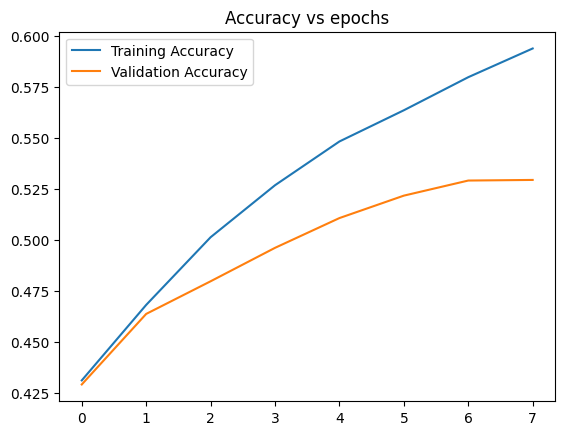

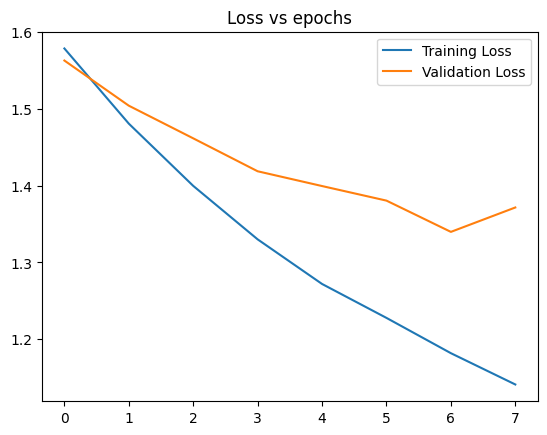

In [ ]:
# Generamos un grafico donde se puede ver el aumento de accuracy y disminucion de loss a travez de las epocas del entrenamiento.
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history_realzado.history['accuracy'] )
plt.plot( history_realzado.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history_realzado.history['loss'] )
plt.plot( history_realzado.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss']);

In [ ]:
# Obtenemos las predicciones de los datos de test.
predictions_realzado = model_realzado.predict(x_test)

313/313 [==============================] - 3s 8ms/step


In [ ]:
# Obtenemos valores comparables con los valores de test_labels.
np.argmax(predictions_realzado,axis=1)

array([3, 8, 0, ..., 5, 1, 7])

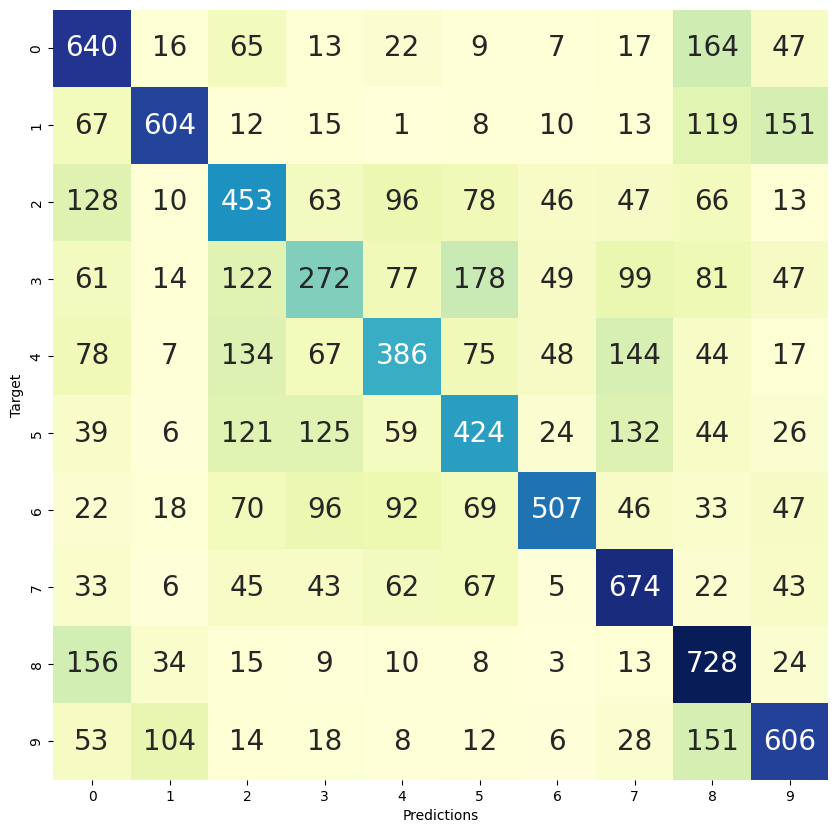

In [ ]:
# Imprimimos la matriz de confusion.
cm_realzado=confusion_matrix(y_test, np.argmax(predictions_realzado,axis=1))
cm_df_realzado=pd.DataFrame(cm_realzado)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_realzado, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');

# 2 - REENTRENO CON DATA AUGMENTATION

Por lo general, la data augmentation se aplica durante la fase de entrenamiento para aumentar la diversidad de los datos de entrenamiento y mejorar la capacidad del modelo para generalizar a nuevas muestras. Durante la evaluación o prueba, se utilizan las imágenes originales del conjunto de prueba sin augmentar.

Al aplicar data augmentation, el modelo se expone a variaciones y transformaciones aleatorias de las imágenes durante el entrenamiento, lo que puede ayudar a mejorar la capacidad de generalización y el rendimiento del modelo.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cargamos el dataset CIFAR-10
(x_train_aumentada, y_train_aumentada), (x_test_aumentada, y_test_aumentada) = keras.datasets.cifar10.load_data()

# Normalizamos los valores de píxel de las imágenes
x_train_aumentada = x_train_aumentada.astype('float32') / 255.0
x_test_aumentada = x_test_aumentada.astype('float32') / 255.0

# Aplicamos data augmentation en las imágenes de entrenamiento
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_aumentada)

In [ ]:
#Empezamos a armar la arquitectura
model_aumentada = keras.Sequential()
model_aumentada.add(layers.Input(shape=(32,32,3)))# ---> vector  L (Entrada para calcular la diferencia y a la q le voy a aplicarr la funcion de energia o loss)

In [ ]:
model_aumentada.add(layers.Conv2D(6, (5,5), activation='relu')) ## 6 filtros de 5*5

# Output shape // Tamaño de salida de la imagen ---> No hay padding por lo que la imagen se reduce
# (ximg - xfilt + 1) * (yimg - yfilt +1)
# (32 - 5 + 1) (32 - 5 +1) = (28)(28)

# Cantidad de parametros
# ((xfil * yfilt * channels) + bias) * cantfiltros
# ((5 * 5 * 3)+1) * 6 = 456
model_aumentada.summary()


#Si tuviese padding hubiese tenido que ser de 2 ---> p= ((tamaño filtro-1)/2)
# (ximg - xfilt + 1 + 2 padding) * (yimg - yfilt + 1 + 2 padding)
# (32 - 5 + 1 + 2*2) (32 - 5 + 1 + 2*2) = (32)(32)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Disminucion del tamaño. ---> A la mitad xq el maxpool es de 2*2
model_aumentada.add(layers.MaxPool2D((2,2), strides=2)) #¿El strides tiene que ser siempre del mismo tamaño que el pool?
model_aumentada.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
Total params: 456
Trainable params: 456
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_aumentada.add(layers.Conv2D(16, (5,5), strides = (1,1), padding='valid', activation='relu'))
model_aumentada.summary()

# Output shape
# (ximg - xfilt + 1) * (yimg - yfilt +1)
# (14 - 5 + 1) (14 - 5 +1) = (10)(10)

# Cantidad de parametros
# ((xfil * yfilt * channels) + bias) * cantfiltros
# ((5 * 5 * 6)+1) * 16 = 2416

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Disminuimos nuevamente el tamaño.
model_aumentada.add(layers.MaxPool2D((2,2), strides=2))

model_aumentada.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_aumentada.add(layers.Flatten())
model_aumentada.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
Total params: 2,872
Trainable params: 2,872
Non-traina

In [ ]:
model_aumentada.add(layers.Dense(120, activation='relu'))
model_aumentada.add(layers.Dense(84, activation='relu'))
model_aumentada.add(layers.Dense(10, activation='softmax'))#---> Vector psi (salida)
model_aumentada.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [ ]:
# Compilamos el modelo seleccionando algunos hiperparametros.
model_aumentada.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS el modelo con los datos de input, y verificamos las metricas seleccionadas para cada epoca con el set de test.
history_aumentada = model_aumentada.fit(datagen.flow(x_train_aumentada, y_train_aumentada),
                    epochs=8,
                    batch_size=100,
                    shuffle=True,
                    validation_data=(x_test_aumentada, y_test_aumentada))

Epoch 1/8
1563/1563 [==============================] - 70s 45ms/step - loss: 1.3384 - accuracy: 0.5224 - val_loss: 1.1700 - val_accuracy: 0.5912
Epoch 2/8
1563/1563 [==============================] - 65s 41ms/step - loss: 1.2930 - accuracy: 0.5386 - val_loss: 1.1198 - val_accuracy: 0.6066
Epoch 3/8
1563/1563 [==============================] - 70s 45ms/step - loss: 1.2631 - accuracy: 0.5509 - val_loss: 1.1370 - val_accuracy: 0.5979
Epoch 4/8
1563/1563 [==============================] - 65s 42ms/step - loss: 1.2317 - accuracy: 0.5613 - val_loss: 1.0967 - val_accuracy: 0.6150
Epoch 5/8
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2140 - accuracy: 0.5676 - val_loss: 1.1818 - val_accuracy: 0.5914
Epoch 6/8
1563/1563 [==============================] - 69s 44ms/step - loss: 1.1991 - accuracy: 0.5749 - val_loss: 1.1084 - val_accuracy: 0.6104
Epoch 7/8
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1863 - accuracy: 0.5801 - val_loss: 1.1893 - val_ac

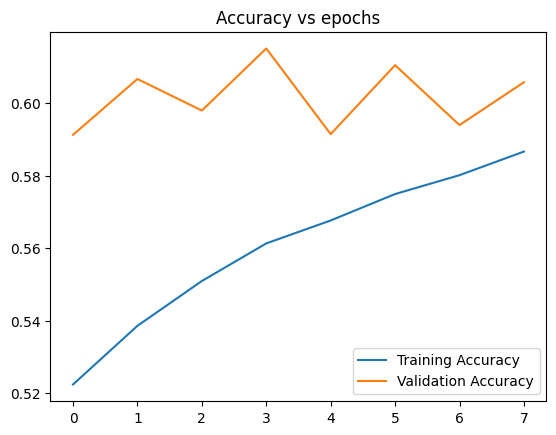

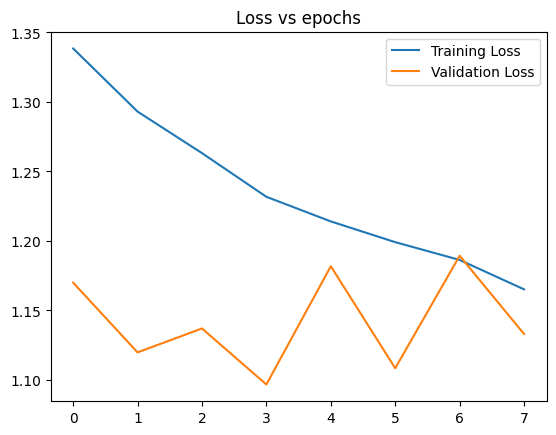

In [ ]:
# Generamos un grafico donde se puede ver el aumento de accuracy y disminucion de loss a travez de las epocas del entrenamiento.
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history_aumentada.history['accuracy'] )
plt.plot( history_aumentada.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history_aumentada.history['loss'] )
plt.plot( history_aumentada.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss']);

In [ ]:
# Obtenemos las predicciones de los datos de test.
predictions_aumentada = model_aumentada.predict(x_test_aumentada)

313/313 [==============================] - 5s 16ms/step


In [ ]:
# Obtenemos valores comparables con los valores de test_labels.
np.argmax(predictions_aumentada,axis=1)

array([3, 1, 1, ..., 5, 0, 7])

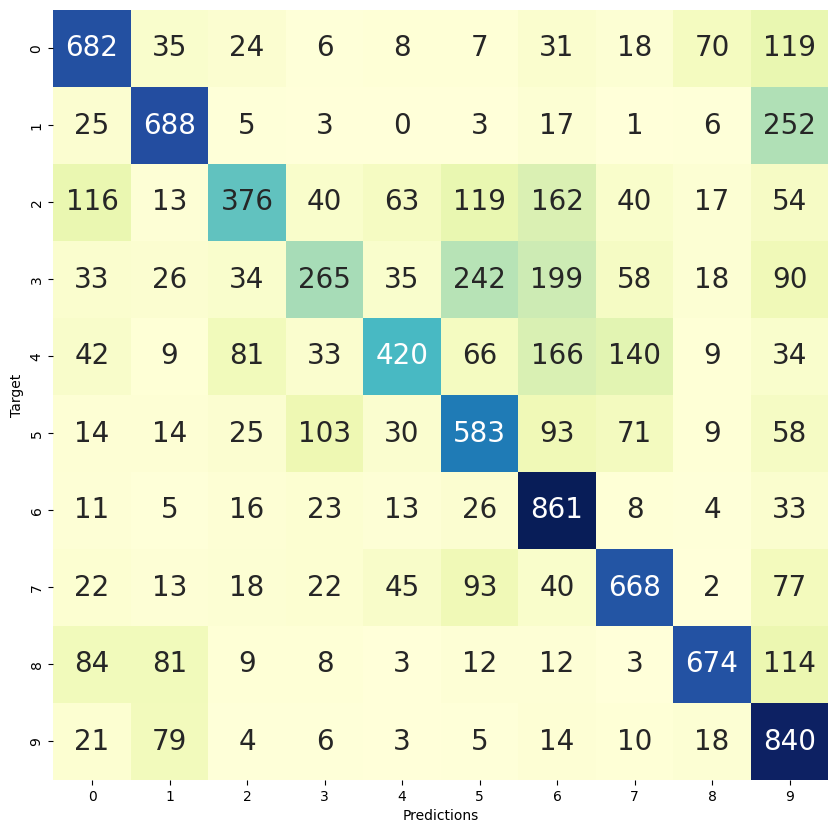

In [ ]:
# Imprimimos la matriz de confusion.
cm_aumentada=confusion_matrix(y_test_aumentada, np.argmax(predictions_aumentada,axis=1))
cm_df_aumentada=pd.DataFrame(cm_aumentada)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_aumentada, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');

# 3 - DETECCION DE BORDES

In [ ]:
import cv2
import numpy as np
from tensorflow import keras

# Carga el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Convierte las imágenes de entrenamiento a escala de grises y aplica el filtro de Canny
x_train_bordes = np.zeros((len(x_train), 32, 32))
y_train_bordes = y_train.copy()
for i in range(len(x_train)):
    img_gray = cv2.cvtColor(x_train[i], cv2.COLOR_RGB2GRAY)
    x_train_bordes[i] = cv2.Canny(img_gray, 10, 20)

# Convierte las imágenes de prueba a escala de grises y aplica el filtro de Canny
x_test_bordes = np.zeros((len(x_test), 32, 32))
y_test_bordes = y_test.copy()
for i in range(len(x_test)):
    img_gray = cv2.cvtColor(x_test[i], cv2.COLOR_RGB2GRAY)
    x_test_bordes[i] = cv2.Canny(img_gray, 10, 20)



170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
# Realiza el preprocesamiento adicional para el modelo CNN
x_train_bordes = x_train_bordes.reshape(x_train_bordes.shape + (1,))
x_train_bordes = x_train_bordes.astype('float32') / 255.0

x_test_bordes = x_test_bordes.reshape(x_test_bordes.shape + (1,))
x_test_bordes = x_test_bordes.astype('float32') / 255.0


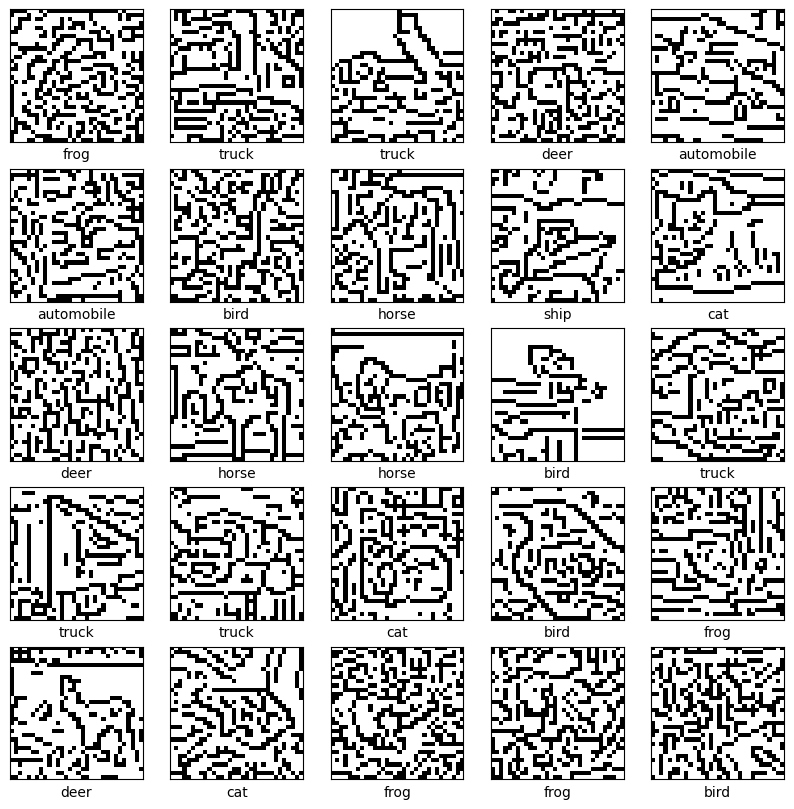

In [ ]:
# Añadimos la lista de nombres de cada clase.
class_names_bordes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Imprimimos unos cuantos elementos del dataset para poder verlos.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_bordes[i], cmap=plt.cm.binary)
    plt.xlabel(class_names_bordes[y_train_bordes[i][0]])
plt.show()

IndexError: ignored

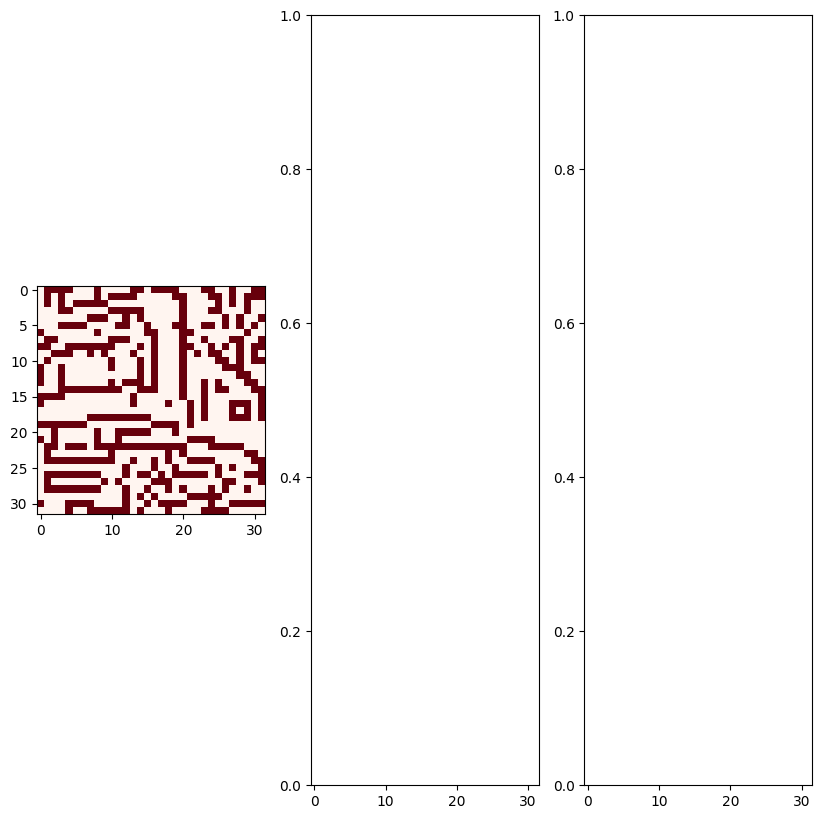

In [ ]:
# Vemos los 3 canales (RGB) de una imagen.

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True)
fig.set_figheight(10)
fig.set_figwidth(10)

axs[0].imshow(x_train_bordes[1][:,:,0], cmap="Reds")
axs[1].imshow(x_train_bordes[1][:,:,1], cmap="Greens")
axs[2].imshow(x_train_bordes[1][:,:,2], cmap="Blues")

plt.show()

In [ ]:
#Empezamos a armar la arquitectura
model_bordes = keras.Sequential()
model_bordes.add(layers.Input(shape=(32,32,1)))# ---> vector  L (Entrada para calcular la diferencia y a la q le voy a aplicarr la funcion de energia o loss)

In [ ]:
model_bordes.add(layers.Conv2D(6, (5,5), activation='relu')) ## 6 filtros de 5*5

# Output shape // Tamaño de salida de la imagen ---> No hay padding por lo que la imagen se reduce
# (ximg - xfilt + 1) * (yimg - yfilt +1)
# (32 - 5 + 1) (32 - 5 +1) = (28)(28)

# Cantidad de parametros
# ((xfil * yfilt * channels) + bias) * cantfiltros
# ((5 * 5 * 1)+1) * 6 = 156

model_bordes.summary()


#Si tuviese padding hubiese tenido que ser de 2 ---> p= ((tamaño filtro-1)/2)
# (ximg - xfilt + 1 + 2 padding) * (yimg - yfilt + 1 + 2 padding)
# (32 - 5 + 1 + 2*2) (32 - 5 + 1 + 2*2) = (32)(32)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Disminucion del tamaño. ---> A la mitad xq el maxpool es de 2*2
model_bordes.add(layers.MaxPool2D((2,2), strides=2)) #¿El strides tiene que ser siempre del mismo tamaño que el pool?
model_bordes.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
Total params: 156
Trainable params: 156
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_bordes.add(layers.Conv2D(16, (5,5), strides = (1,1), padding='valid', activation='relu'))
model_bordes.summary()

# Output shape
# (ximg - xfilt + 1) * (yimg - yfilt +1)
# (14 - 5 + 1) (14 - 5 +1) = (10)(10)

# Cantidad de parametros
# ((xfil * yfilt * channels) + bias) * cantfiltros
# ((5 * 5 * 6)+1) * 16 = 816 --->ver xq es 6 canales

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Disminuimos nuevamente el tamaño.
model_bordes.add(layers.MaxPool2D((2,2), strides=2))

model_bordes.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
Total params: 2,572
Trainable params: 2,572
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_bordes.add(layers.Flatten())
model_bordes.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
Total params: 2,572
Trainable params: 2,572
Non-trainabl

In [ ]:
model_bordes.add(layers.Dense(120, activation='relu'))
model_bordes.add(layers.Dense(84, activation='relu'))
model_bordes.add(layers.Dense(10, activation='softmax'))#---> Vector psi (salida)
model_bordes.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
# Compilamos el modelo seleccionando algunos hiperparametros.
model_bordes.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# ENTRENAMOS el modelo con los datos de input, y verificamos las metricas seleccionadas para cada epoca con el set de test.
history_bordes=model_bordes.fit(x_train_bordes, y_train_bordes,
                  epochs=8,
                  batch_size=100,
                  shuffle=True,
                  validation_data=(x_test_bordes, y_test_bordes))

Epoch 1/8
500/500 [==============================] - 35s 61ms/step - loss: 1.9068 - accuracy: 0.2991 - val_loss: 1.6964 - val_accuracy: 0.3898
Epoch 2/8
500/500 [==============================] - 30s 61ms/step - loss: 1.6134 - accuracy: 0.4254 - val_loss: 1.5919 - val_accuracy: 0.4326
Epoch 3/8
500/500 [==============================] - 40s 80ms/step - loss: 1.5148 - accuracy: 0.4615 - val_loss: 1.5203 - val_accuracy: 0.4651
Epoch 4/8
500/500 [==============================] - 41s 82ms/step - loss: 1.4472 - accuracy: 0.4893 - val_loss: 1.4651 - val_accuracy: 0.4805
Epoch 5/8
500/500 [==============================] - 47s 93ms/step - loss: 1.3927 - accuracy: 0.5094 - val_loss: 1.4295 - val_accuracy: 0.4998
Epoch 6/8
500/500 [==============================] - 37s 73ms/step - loss: 1.3506 - accuracy: 0.5225 - val_loss: 1.4148 - val_accuracy: 0.4994
Epoch 7/8
500/500 [==============================] - 39s 77ms/step - loss: 1.3089 - accuracy: 0.5372 - val_loss: 1.3868 - val_accuracy: 0.5087

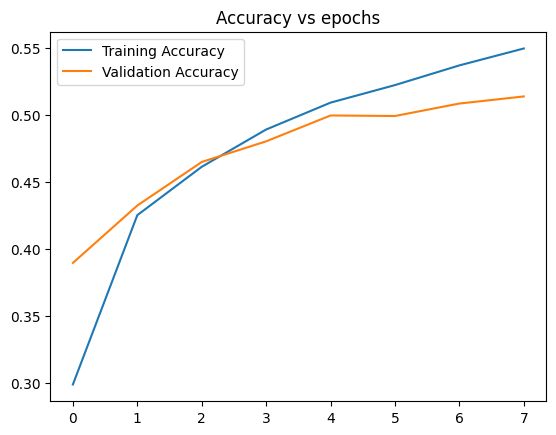

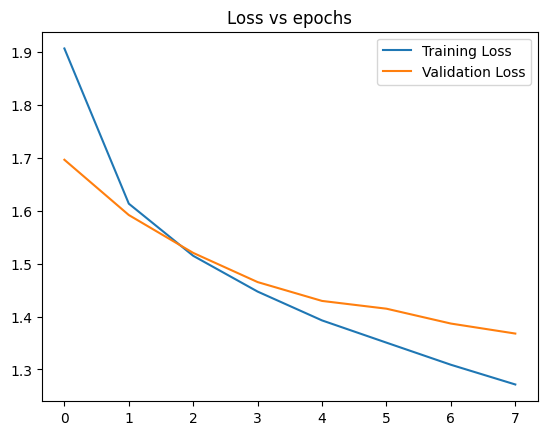

In [ ]:
# Generamos un grafico donde se puede ver el aumento de accuracy y disminucion de loss a travez de las epocas del entrenamiento.
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history_bordes.history['accuracy'] )
plt.plot( history_bordes.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history_bordes.history['loss'] )
plt.plot( history_bordes.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss']);

In [ ]:
# Obtenemos las predicciones de los datos de test.
predictions_bordes = model_bordes.predict(x_test_bordes)

313/313 [==============================] - 2s 6ms/step


In [ ]:
# Obtenemos valores comparables con los valores de test_labels.
np.argmax(predictions_bordes,axis=1)

array([6, 8, 1, ..., 2, 1, 7])

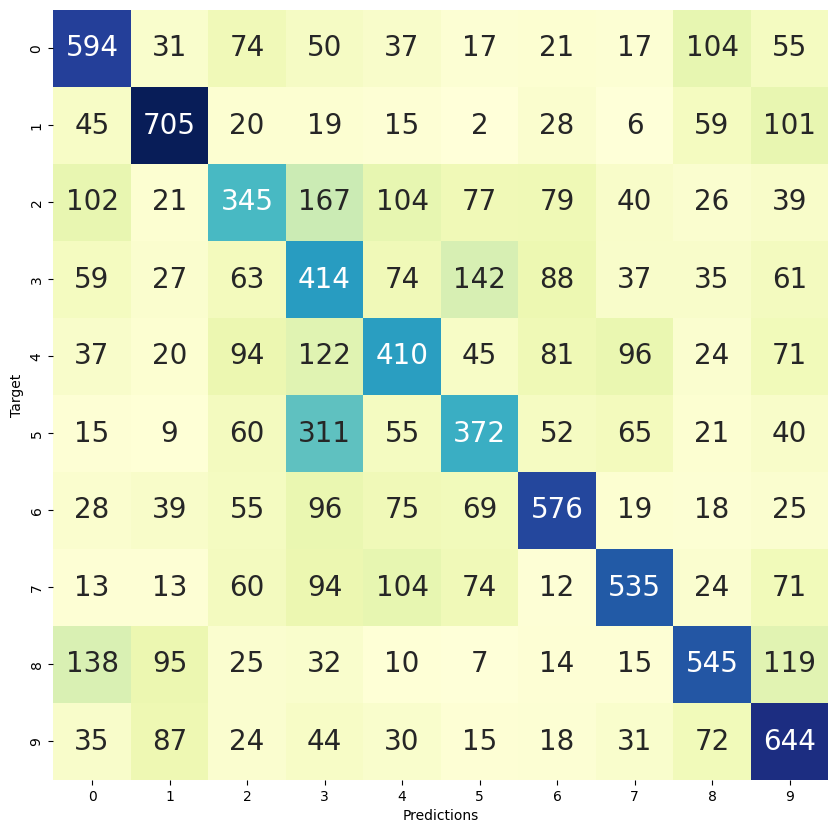

In [ ]:
# Imprimimos la matriz de confusion.
cm_bordes=confusion_matrix(y_test_bordes, np.argmax(predictions_bordes,axis=1))
cm_df_bordes=pd.DataFrame(cm_bordes)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df_bordes, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');

# -----------0-------------

#10 - CODIGOS EXTRAS

# REALCE

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [ ]:
# Carga el conjunto de datos CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Elige una imagen de ejemplo del conjunto de entrenamiento
imagen_indice = 0
img = x_train[imagen_indice]

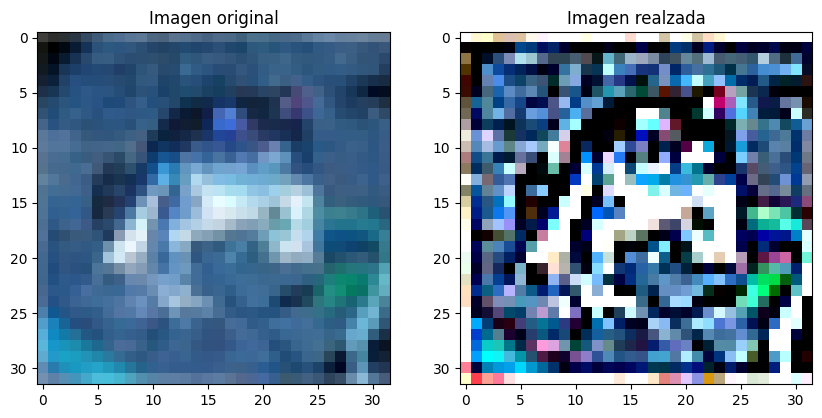

In [ ]:
# Carga la imagen
# img = cv2.imread('Fotogato2.jpg')

# Crea el kernel de realce
kernel = np.array([[-1,-1,-1],
[-1, 9,-1],
[-1,-1,-1]])

# Aplica el filtro de realce
img_realzada = cv2.filter2D(img, -1, kernel)

# Muestra la imagen original y la imagen realzada
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.set_title('Imagen original')

ax2.imshow(cv2.cvtColor(img_realzada, cv2.COLOR_BGR2RGB))
ax2.set_title('Imagen realzada')

plt.show()


#CODIGO APLICADO A TODO EL SET DE IMAGENES

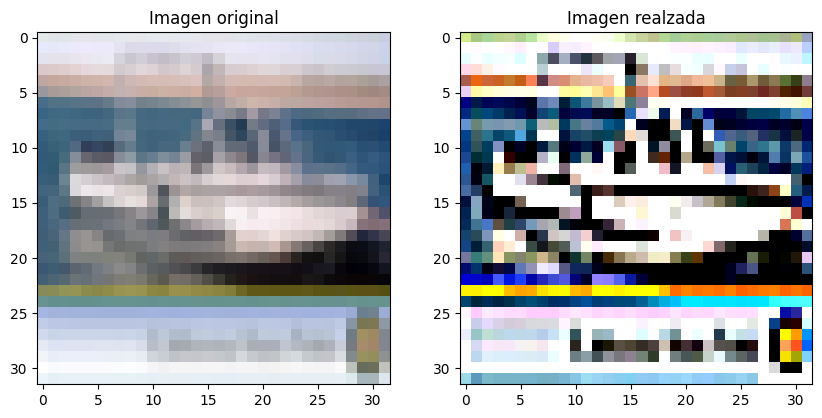

In [ ]:

# Crea el kernel de realce
kernel = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])

# Aplica el filtro de realce a todas las imágenes de entrenamiento
x_train_realzadas = np.zeros_like(x_train)
for i in range(len(x_train)):
    img = x_train[i]
    img_realzada = cv2.filter2D(img, -1, kernel)
    x_train_realzadas[i] = img_realzada

# Aplica el filtro de realce a todas las imágenes de prueba
x_test_realzadas = np.zeros_like(x_test)
for i in range(len(x_test)):
    img = x_test[i]
    img_realzada = cv2.filter2D(img, -1, kernel)
    x_test_realzadas[i] = img_realzada

# Muestra una imagen original y su correspondiente imagen realzada
imagen_indice = 155
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(x_train[imagen_indice])
ax1.set_title('Imagen original')
ax2.imshow(x_train_realzadas[imagen_indice])
ax2.set_title('Imagen realzada')
plt.show()

# GUARDO LAS IMAGENES REALZADAS

In [ ]:
import os
import cv2

In [ ]:
# Directorio de destino para las imágenes realzadas
directorio_destino = '/content/DRIVE/MyDrive/Imagenes_realzadas'

# Guardar las imágenes realzadas en el directorio de destino
for i in range(len(x_test_realzadas)):
    imagen = x_test_realzadas[i]
    nombre_archivo = f'imagen_{i}.jpg'  # Nombre del archivo de imagen
    ruta_archivo = os.path.join(directorio_destino, nombre_archivo)
    cv2.imwrite(ruta_archivo, imagen)

print('Imágenes guardadas en el directorio:', directorio_destino)

Imágenes guardadas en el directorio: /content/DRIVE/MyDrive/Imagenes_realzadas


In [ ]:
directorio_imagenes = '/content/DRIVE/MyDrive/Imagenes_realzadas'

# Obtener la lista de archivos en el directorio
archivos = os.listdir(directorio_imagenes)

# Crear una lista para almacenar las imágenes
imagenes = []

# Cargar cada imagen del directorio
for archivo in archivos:
    ruta_archivo = os.path.join(directorio_imagenes, archivo)
    imagen = cv2.imread(ruta_archivo)
    imagenes.append(imagen)

# Convertir la lista de imágenes en un arreglo NumPy
x_new = np.array(imagenes)
x_new = x_new.astype('float32') / 255.0

#LEVANTO MODELO ETRENADO

In [ ]:
from keras.models import load_model

In [ ]:
# Carga el modelo entrenado desde el archivo HDF5
model = load_model('modelo_entrenado.h5')

#PREDICCION REALZADA

In [ ]:
# Realiza predicciones con el modelo cargado
predictions = model.predict(x_new)

313/313 [==============================] - 4s 11ms/step


In [ ]:
# Obtenemos valores comparables con los valores de test_labels.
np.argmax(predictions,axis=1)

array([6, 1, 1, ..., 5, 1, 6])

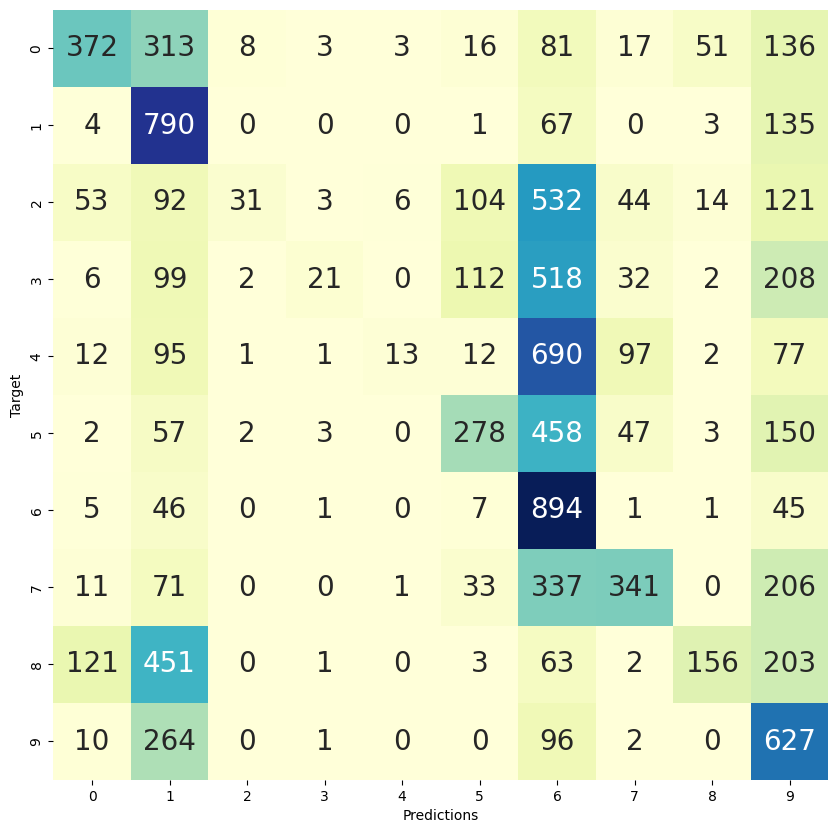

In [ ]:
# Imprimimos la matriz de confusion.
cm=confusion_matrix(test_labels, np.argmax(predictions,axis=1))
cm_df=pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');